<a href="https://colab.research.google.com/github/blakesodikoff/1221DarkMatter/blob/main/Week_7_GW190521_074359_Updated_GravitationalWave_Blake_Sodikoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy # Installing the module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99255 sha256=39abff8fd03f466ea98d6eb5912e7ce778025457a1475ac288150c2b8bcb5cf6
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [2]:
# # -- Set a GPS time:
t0 = 1242459857.4	    # -- GW May 21 2019 # Sets the variable t0 to the specified GPS
# time event.
# t0 = 1242459857.4

from gwpy.timeseries import TimeSeries # imports the TimeSeries from the
# imported module previously.
hdata = TimeSeries.fetch_open_data('H1', t0 - 32.0, t0 + 32.0)
# This gets the grav. wave data from the detector and starts
# 32 seconds before and ends 32 seconds after. Store it in hdata.

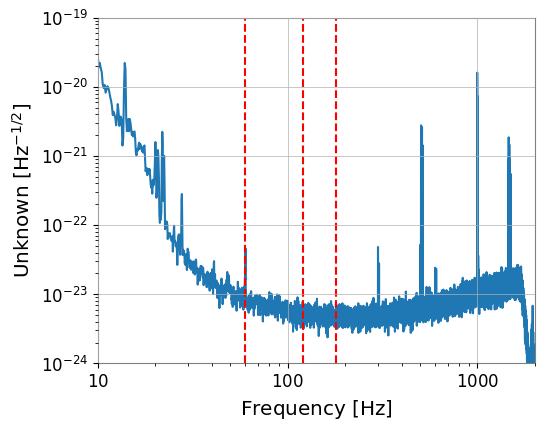

In [3]:
import matplotlib.pyplot as plt # imports the matplotlib library,
# refer to it now as plt.

# -- Plot ASD
fig2 = hdata.asd(fftlength=8).plot() # calculates a portion of the hdata
plt.xlim(10,2000) # set the x limit axis
ymin = 1e-24 # set the minimum y value
ymax = 1e-19 # set the maximum y value
plt.ylim(ymin, ymax) # sets y axis limits
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") #Add the dashed line
# at 60 to denote the spike from electrical current.
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") # Add another
# vertical line at 120
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red") # add another
# vertical line at 180.

In [4]:
from gwpy.signal import filter_design # import filter design
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # bandpass filter from
# 50 - 120 Hz.

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 120, 180)] # create filters for the specified spikes.

zpk = filter_design.concatenate_zpks(bp, *notches) # store the filters and
# bandpass in zpk.

hfilt = hdata.filter(zpk, filtfilt=True) # apply the created filters, store it
# in hfilt.


In [5]:
hdata = hdata.crop(*hdata.span.contract(1)) # Crops data
hfilt = hfilt.crop(*hfilt.span.contract(1)) # Crops the filtered data

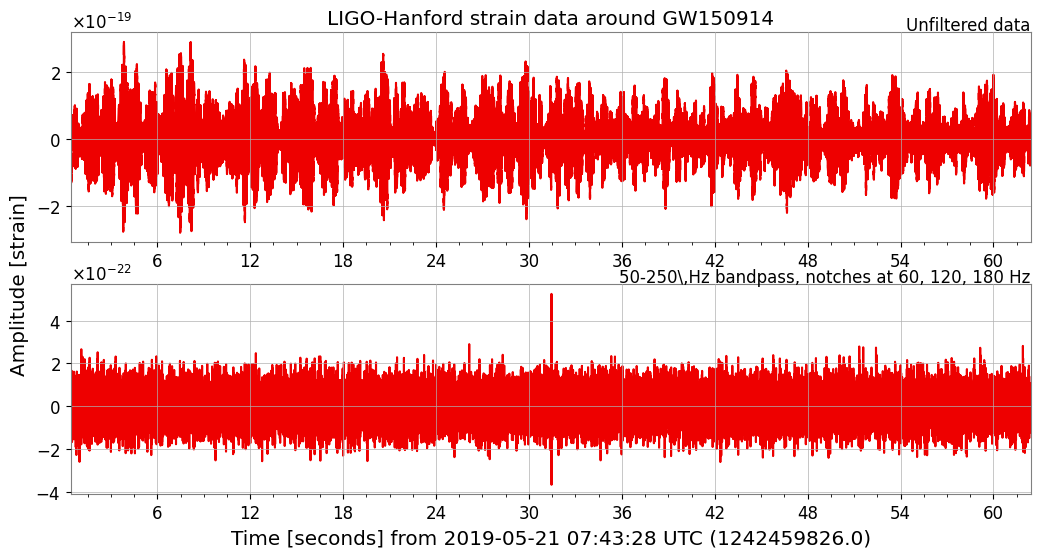

In [6]:
from gwpy.plot import Plot # import plot from gwpy.plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford') # Create a plot of both hdata and hfilt
            # gives the figure size and separates them. also creates color.
ax1, ax2 = plot.axes # gets the axes from before, stores them in specified.
ax1.set_title('LIGO-Hanford strain data around GW150914') # set the title
# the following line adds a text labeling it with unfiltered data.
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
# Set the y axis label to amplitude [strain]
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
# Remove the other y axis label.
ax2.set_ylabel('')
# add a text label for the filter settings
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
# display the plot
plot.show()

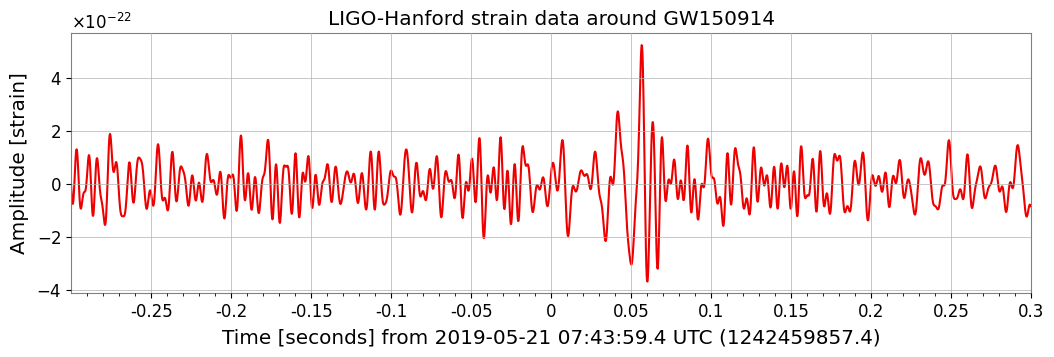

In [7]:
# repeating the import of matplotlib.
import matplotlib.pyplot as plt
# create a new plot for the hfilt
plot = hfilt.plot(color='gwpy:ligo-hanford')
# finds the axis object from the plot and stores it in ax.
ax = plot.gca()
# Set the title for the current plot.
ax.set_title('LIGO-Hanford strain data around GW150914')
# Set the y axis label to Amplitude [Strain]
ax.set_ylabel('Amplitude [strain]')
# set the x-axis limits
ax.set_xlim(t0 - 0.3, t0 + 0.3)
# set the x axis scale to seconds
ax.set_xscale('seconds', epoch=t0)
# Show the plot
plot.show()
# get the x value data
x_val = plt.gca().lines[0].get_xdata()
# Get the y value data
y_val = plt.gca().lines[0].get_ydata()


In [8]:
# fetch the gravitational wave data from L1 (livingston)
ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)
# Apply the bandpass and filters stored in zpk from before
lfilt = ldata.filter(zpk, filtfilt=True)

In [9]:
# shift the data to account for speed of light.
lfilt.shift('6.9ms')
# invert the filtered data
lfilt *= -1

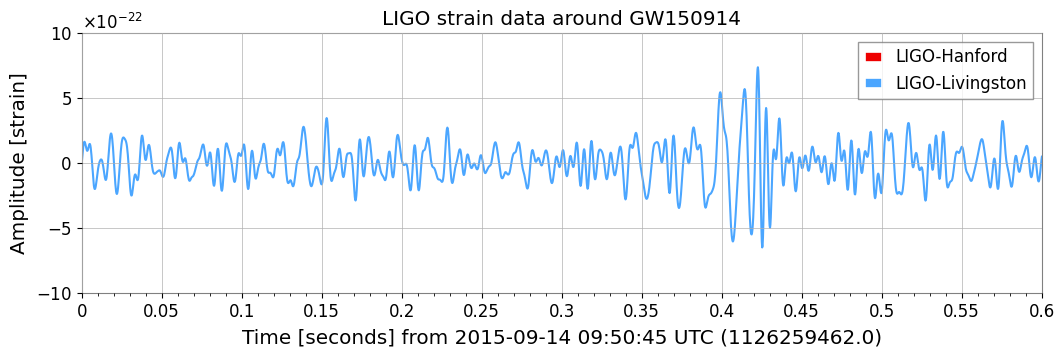

In [10]:
# create a new plot, different size.
plot = Plot(figsize=[12, 4])
# get the axis object and store in ax.
ax = plot.gca()
# plot the filtered data from Hanford
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
# plot the filtered data from Livingston
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
# set the title of the current plot
ax.set_title('LIGO strain data around GW150914')
# set the x axis limits
ax.set_xlim(1126259462, 1126259462.6)
# set the x axis scale
ax.set_xscale('seconds', epoch=1126259462)
# set the y axis label
ax.set_ylabel('Amplitude [strain]')
# set the y axis limit
ax.set_ylim(-1e-21, 1e-21)
# add a legend to the plot to explain.
ax.legend()
# show the plot.
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

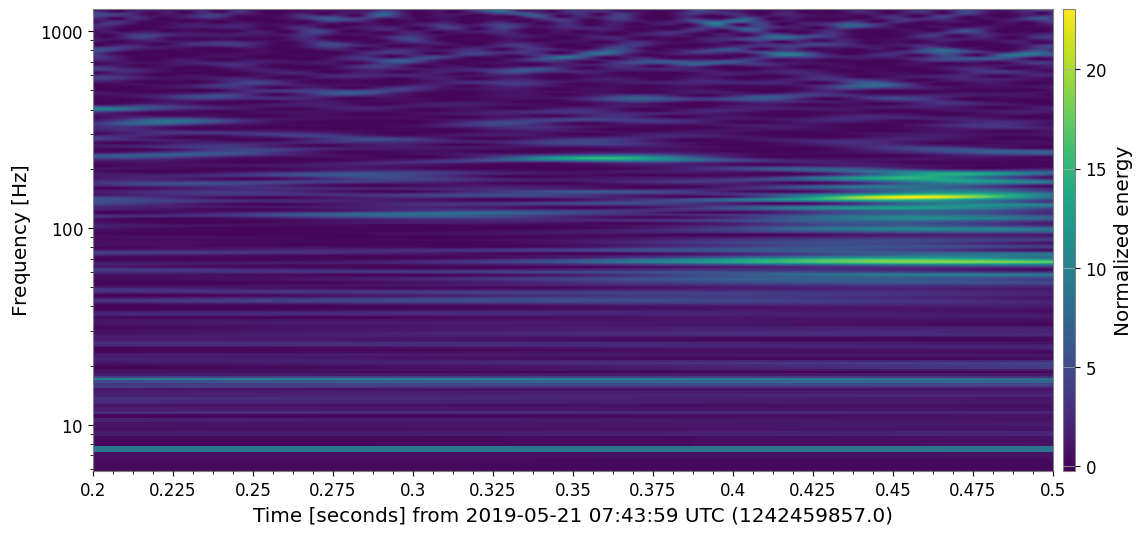

In [11]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
# perform the q transform on the hfilt data
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
# plot the transformed data stored in hq.
fig4 = hq.plot()
# Finds the current axis object from the other plot. store it in ax.
ax = fig4.gca()
# add a color bar, label it Normalized Energy.
fig4.colorbar(label="Normalized energy")
# disable grid.
ax.grid(False)
# set y-axis scale
ax.set_yscale('log')

In [12]:
# imports write from scipy.io.wavfile for audio file.
from scipy.io.wavfile import write
# import numpy library, abbreviate to np.
import numpy as np

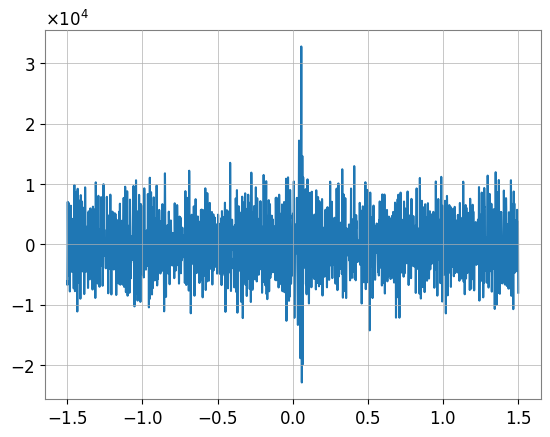

In [13]:
# find the max value and store it in amplitude
amplitude = np.iinfo(np.int16).max
# find where x val is within 1.5 seconds store in ind.
ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))
# uses the stored values in ind and filter y val to the filtered values in y.
y = y_val[ind]
# y = y**3
# divide the array by max value.
y = y / np.max(y)
# plot this normalized and amplified data.
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [14]:
# calculate frequency
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# print the calculated frequency
print("fs = ", fs)
# write the data to a .wav file with this frequency.
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))

fs =  4096


In [15]:
# import file from colab
from google.colab import files
# download of the example wav.
files.download("example.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5
fs =  4096


<ipython-input-22-ddc28d972561>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-22-ddc28d972561>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
<ipython-input-22-ddc28d972561>:58: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

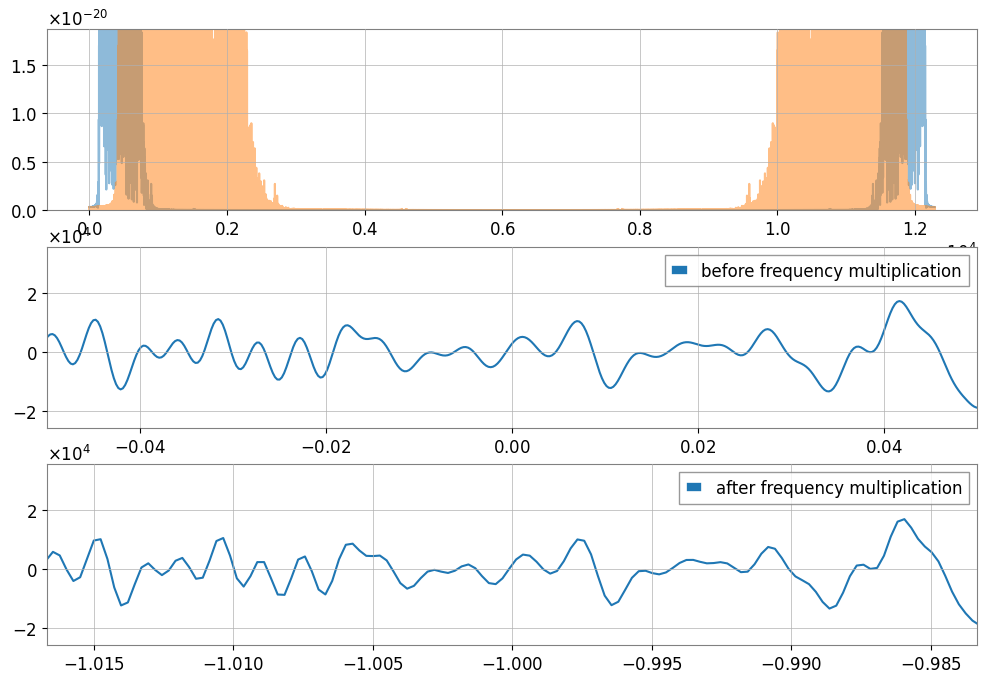

In [22]:
t_clip = 1.5
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip)))
x = x_val[ind]
y = y_val[ind]

# plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="oringinal")
# print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))

up_sample = 3

y_fft = np.fft.fft(y)
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble)
y_fft_old = y_fft

num = len(y_fft)
for i in np.arange(int(num / up_sample)):
    y_fft_new[int(i * up_sample)] = y_fft[int(i)]

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

# y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)
# plot the figure with a specified size
plt.figure(figsize=(12,8))
plt.subplot(311)
# plot subplot
plt.plot(np.abs(y_fft_old), alpha=0.5)
plt.plot(np.abs(y_fft_new), alpha=0.5)
ylim = np.percentile(np.abs(y_fft), 95)
# establish y limit
plt.ylim(0, ylim)

plt.subplot(312)
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old)
# plot the graph before the frequency multiplication
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y)
# plot the graph after the frequency multiplication
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-t_clip + t_clip / up_sample - 0.05 / up_sample, -t_clip + t_clip / up_sample + 0.05 / up_sample)
plt.legend()
print(t_clip / up_sample)

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs)
write("example.wav", fs, (np.array(y[0:int(num/up_sample)]) * amplitude).astype(np.int16))

from google.colab import files
files.download("example.wav")

In [17]:
# print values for fft new and old.
print(y_fft[0:4], y_fft[-3:])
print(y_fft_new[0:10], y_fft_new[-3:])
print(y_fft_old[0:4], y_fft_old[-3:])

[3.52843988e-22+0.00000000e+00j 3.52855713e-22+1.83729834e-24j
 3.52890893e-22+3.67480641e-24j 3.52949536e-22+5.51273472e-24j] [3.52949536e-22-5.51273472e-24j 3.52890893e-22-3.67480641e-24j
 3.52855713e-22-1.83729834e-24j]
[3.52843988e-22+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 3.52855713e-22+1.83729834e-24j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 3.52890893e-22+3.67480641e-24j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 3.52949536e-22+5.51273472e-24j] [3.52855713e-22-1.83729834e-24j 0.00000000e+00-0.00000000e+00j
 0.00000000e+00-0.00000000e+00j]
[3.52843988e-22+0.00000000e+00j 3.52855713e-22+1.83729834e-24j
 3.52890893e-22+3.67480641e-24j 3.52949536e-22+5.51273472e-24j] [3.52949536e-22-5.51273472e-24j 3.52890893e-22-3.67480641e-24j
 3.52855713e-22-1.83729834e-24j]


In [18]:
# install pydub module
!pip install pydub
from pydub import AudioSegment

In [19]:
# create waveform for sound
sound = AudioSegment.from_file("example.wav")
print(sound.frame_rate)
# sound.frame_rate = 1024
print(sound.frame_rate)
sound = sound.set_frame_rate(4096 * 4)
sound.frame_rate = 4096 * 2
sound.export("example_slow.wav")
files.download("example_slow.wav")

4096
4096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Make C

(0.0, 0.1)

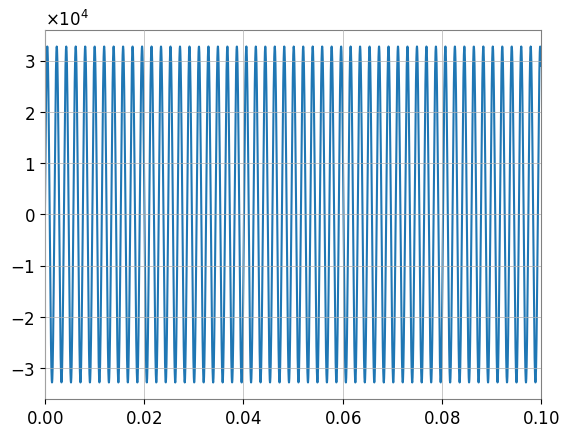

In [20]:
# set samplerate and frequency.
samplerate = 44100; fs = 261.63 * 2.0
# create an array t with values from 0 to 1.
t = np.linspace(0., 1., samplerate)
# assign max amplitude again to amplitude.
amplitude = np.iinfo(np.int16).max
# generate a sine wave
data = amplitude * np.sin(2. * np.pi * fs * t)
# plot generated sine wave.
plt.plot(t, data)
# set x axis limits
plt.xlim(0, 0.1)

In [21]:
# import files from colab again
from google.colab import files

# write the sine wave data into a waveform file
write("C.wav", samplerate, data.astype(np.int16))
# download the waveform file for C titled c.wav.
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>